In [44]:
import PIL
import os, glob
from matplotlib import pyplot as plt
import pandas as pd
import random

Функция ошибки (MSE на парах соответствующих пикселей)

In [3]:
loss = pd.read_csv('./loss.csv')

In [23]:
min_val_iter = int(loss[loss['val'] == loss['val'].min()].iloc[:,0])

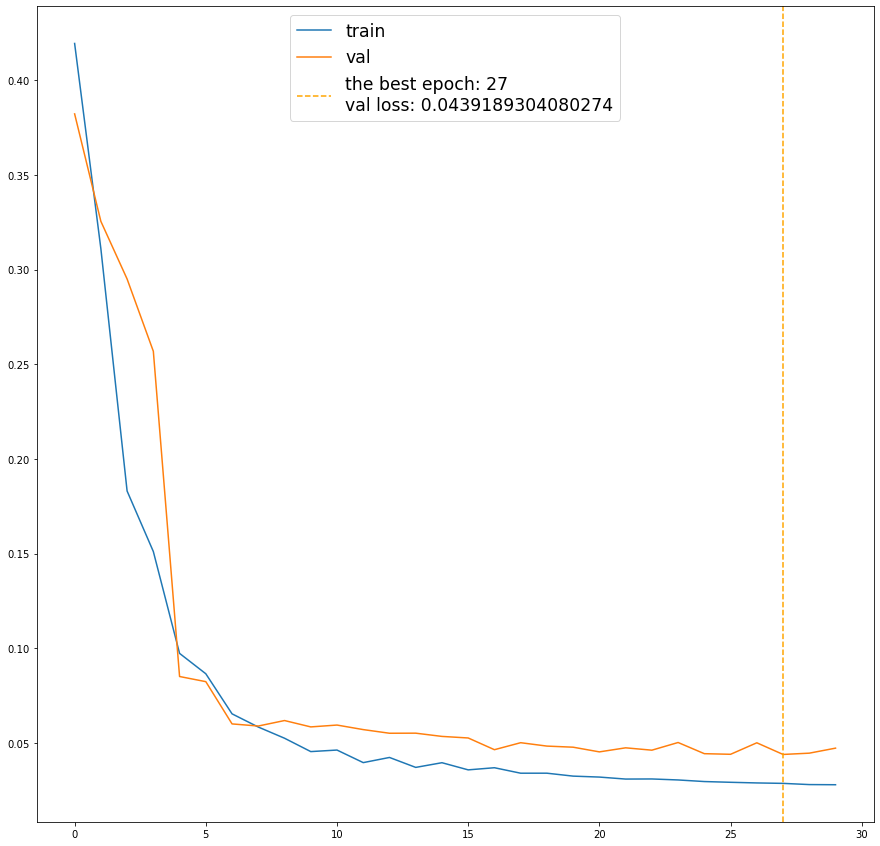

In [40]:
plt.figure(figsize=(15, 15))
plt.plot(loss.iloc[:,0], loss.iloc[:,1], label='train')
plt.plot(loss.iloc[:,0], loss.iloc[:,2], label='val')
plt.axvline(min_val_iter, linestyle='--', color='orange', label=f"the best epoch: {min_val_iter}\nval loss: {loss['val'].min()}")
plt.legend(fontsize='xx-large')
plt.show()

Судя по поднимающемуся хвосту функции после 27 эпохи, дальше могло начаться переобучение.

На выбранной функции потерь достигнут неплохой результат.

Визуальный анализ результатов

In [42]:
processed_dir = "./predicted_photos/"
os.chdir(processed_dir)
processed_photos_links = glob.glob("*.jpeg")
processed_photos_links = list(map(lambda x : os.path.join(processed_dir, x), processed_photos_links))
os.chdir("..")

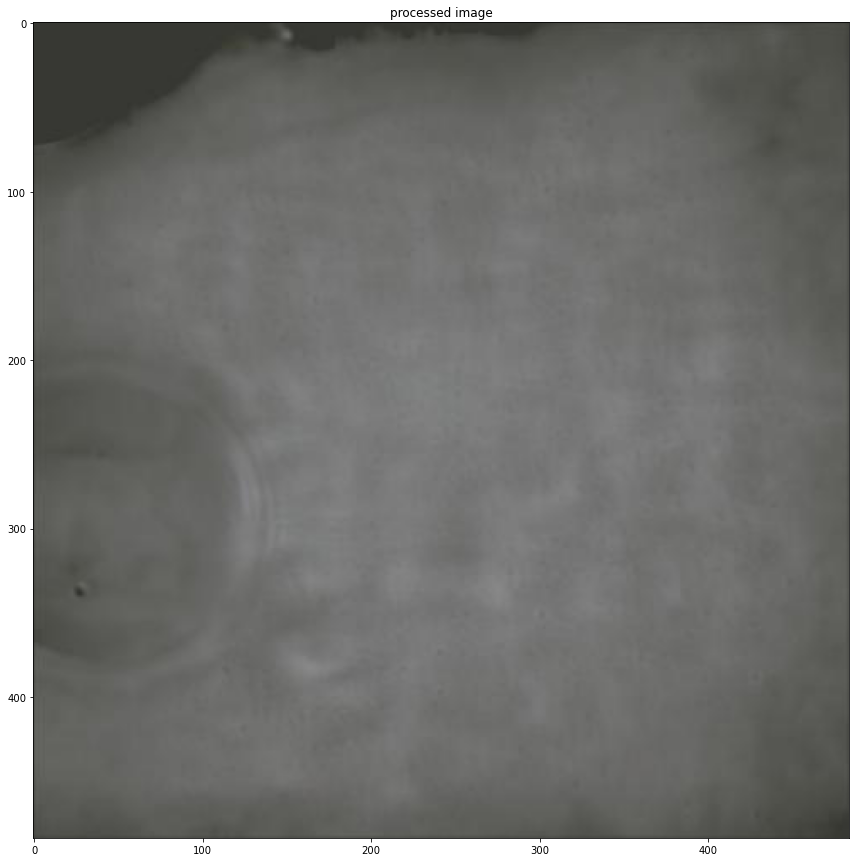

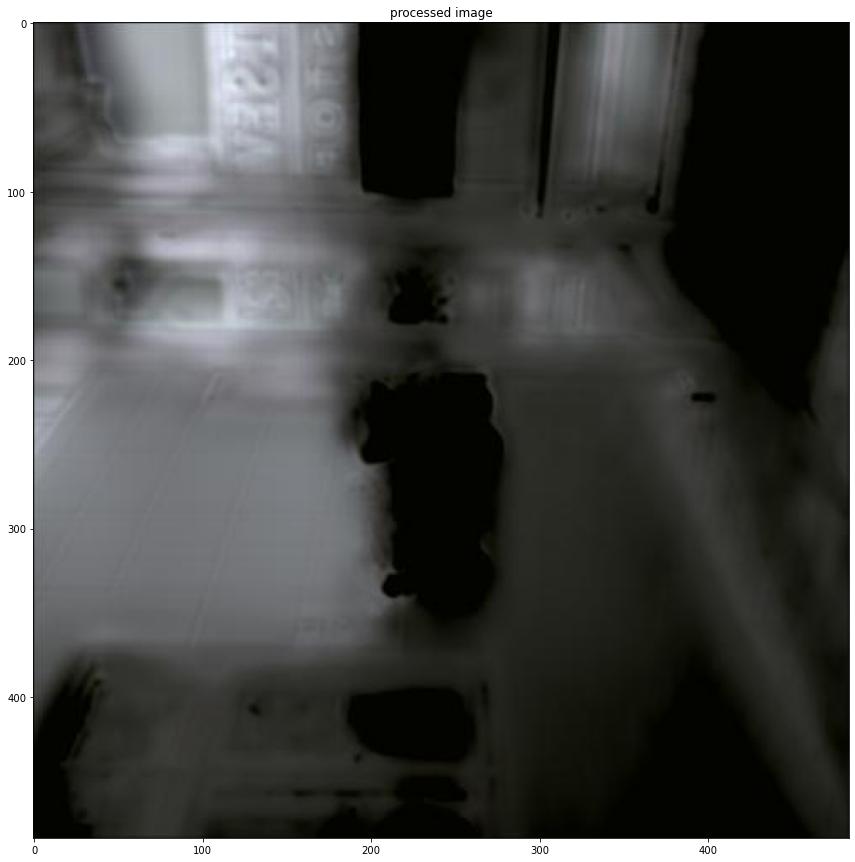

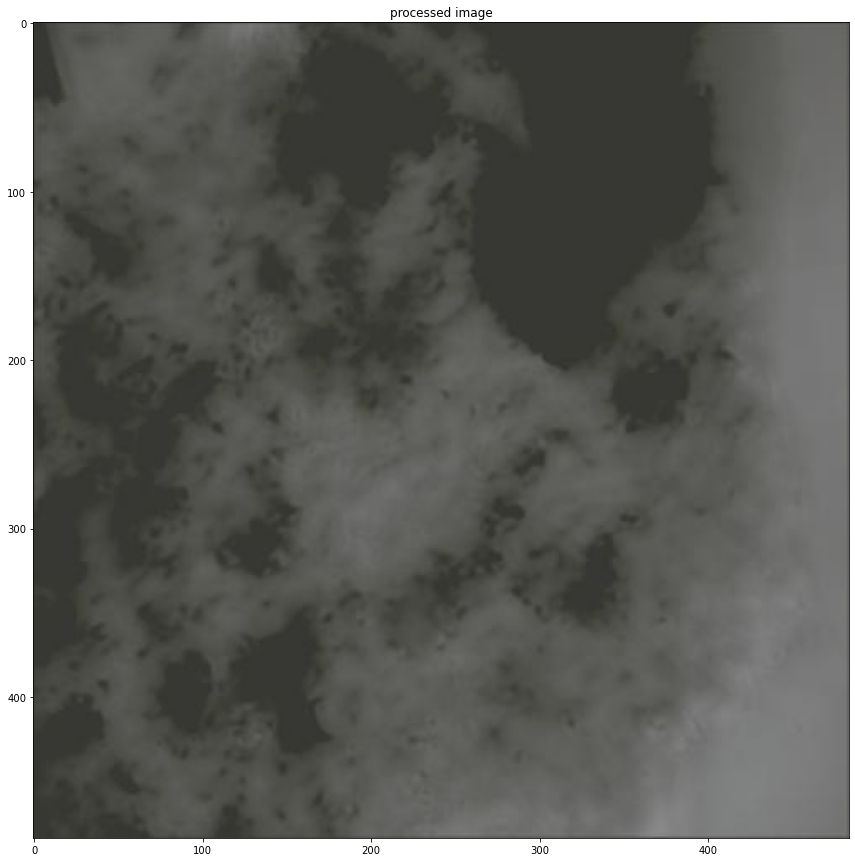

In [45]:
idxs = [random.randint(0, 8) for p in range(0, 3)]
for i in idxs:
    with PIL.Image.open(processed_photos_links[i]) as im:
        plt.figure(figsize=(15, 15))
        plt.title(f"processed image")
        plt.imshow(im)

Мде.. Они черно-белые!
И на самом деле я проверила, из юнета они появляются визуально черно-белые, значения пикселей в каналах отличаются едва-едва, а после конвертации и вовсе.

Скорее всего дело в том, что выбрана неэффективная функция потери.

Итоги:

1. Что-то получилось. Необходимо поискать функцию потерь (или их комбинацию) получше.

2. Для увеличения датасета можно использовать простую аугментацию (отзеркаливания, повороты).